In [1]:
from yadlt.context import FitContext
from yadlt.distribution import Distribution

import numpy as np

In [2]:
import logging
from yadlt.log import setup_logger

# Set up the root logger to capture all logs in jupyter notebook
logger = setup_logger()

# If you want to see all messages, including DEBUG:
logger.setLevel(logging.INFO)

In [3]:
def collect_loss_histories(context):
  nreplicas = context.get_all_properties()['nreplicas']
  epochs = context.load_epoch_history(0)
  loss_dis = Distribution("Loss ensemble by epoch", size = nreplicas, shape=(epochs.size, ))
  for rep in range(nreplicas):
    loss = context.load_loss_history(rep)
    # Check if negative loss values are present
    if np.any(loss < 0):
        print(f"Warning: Negative loss values found in replica {rep}.")
    loss_dis.add(loss)
  return loss_dis, epochs

In [4]:
context = FitContext("250911-06-L2-nnpdf-like")

In [5]:
loss, epochs = collect_loss_histories(context)

In [6]:
from yadlt.distribution import combine_distributions
eigval_t = combine_distributions(context.eigvals_time)
eigval_1 = eigval_t.slice((slice(None), 0))
eigval_2 = eigval_t.slice((slice(None), 1))
eigval_3 = eigval_t.slice((slice(None), 2))
eigval_4 = eigval_t.slice((slice(None), 3))
eigval_5 = eigval_t.slice((slice(None), 4))

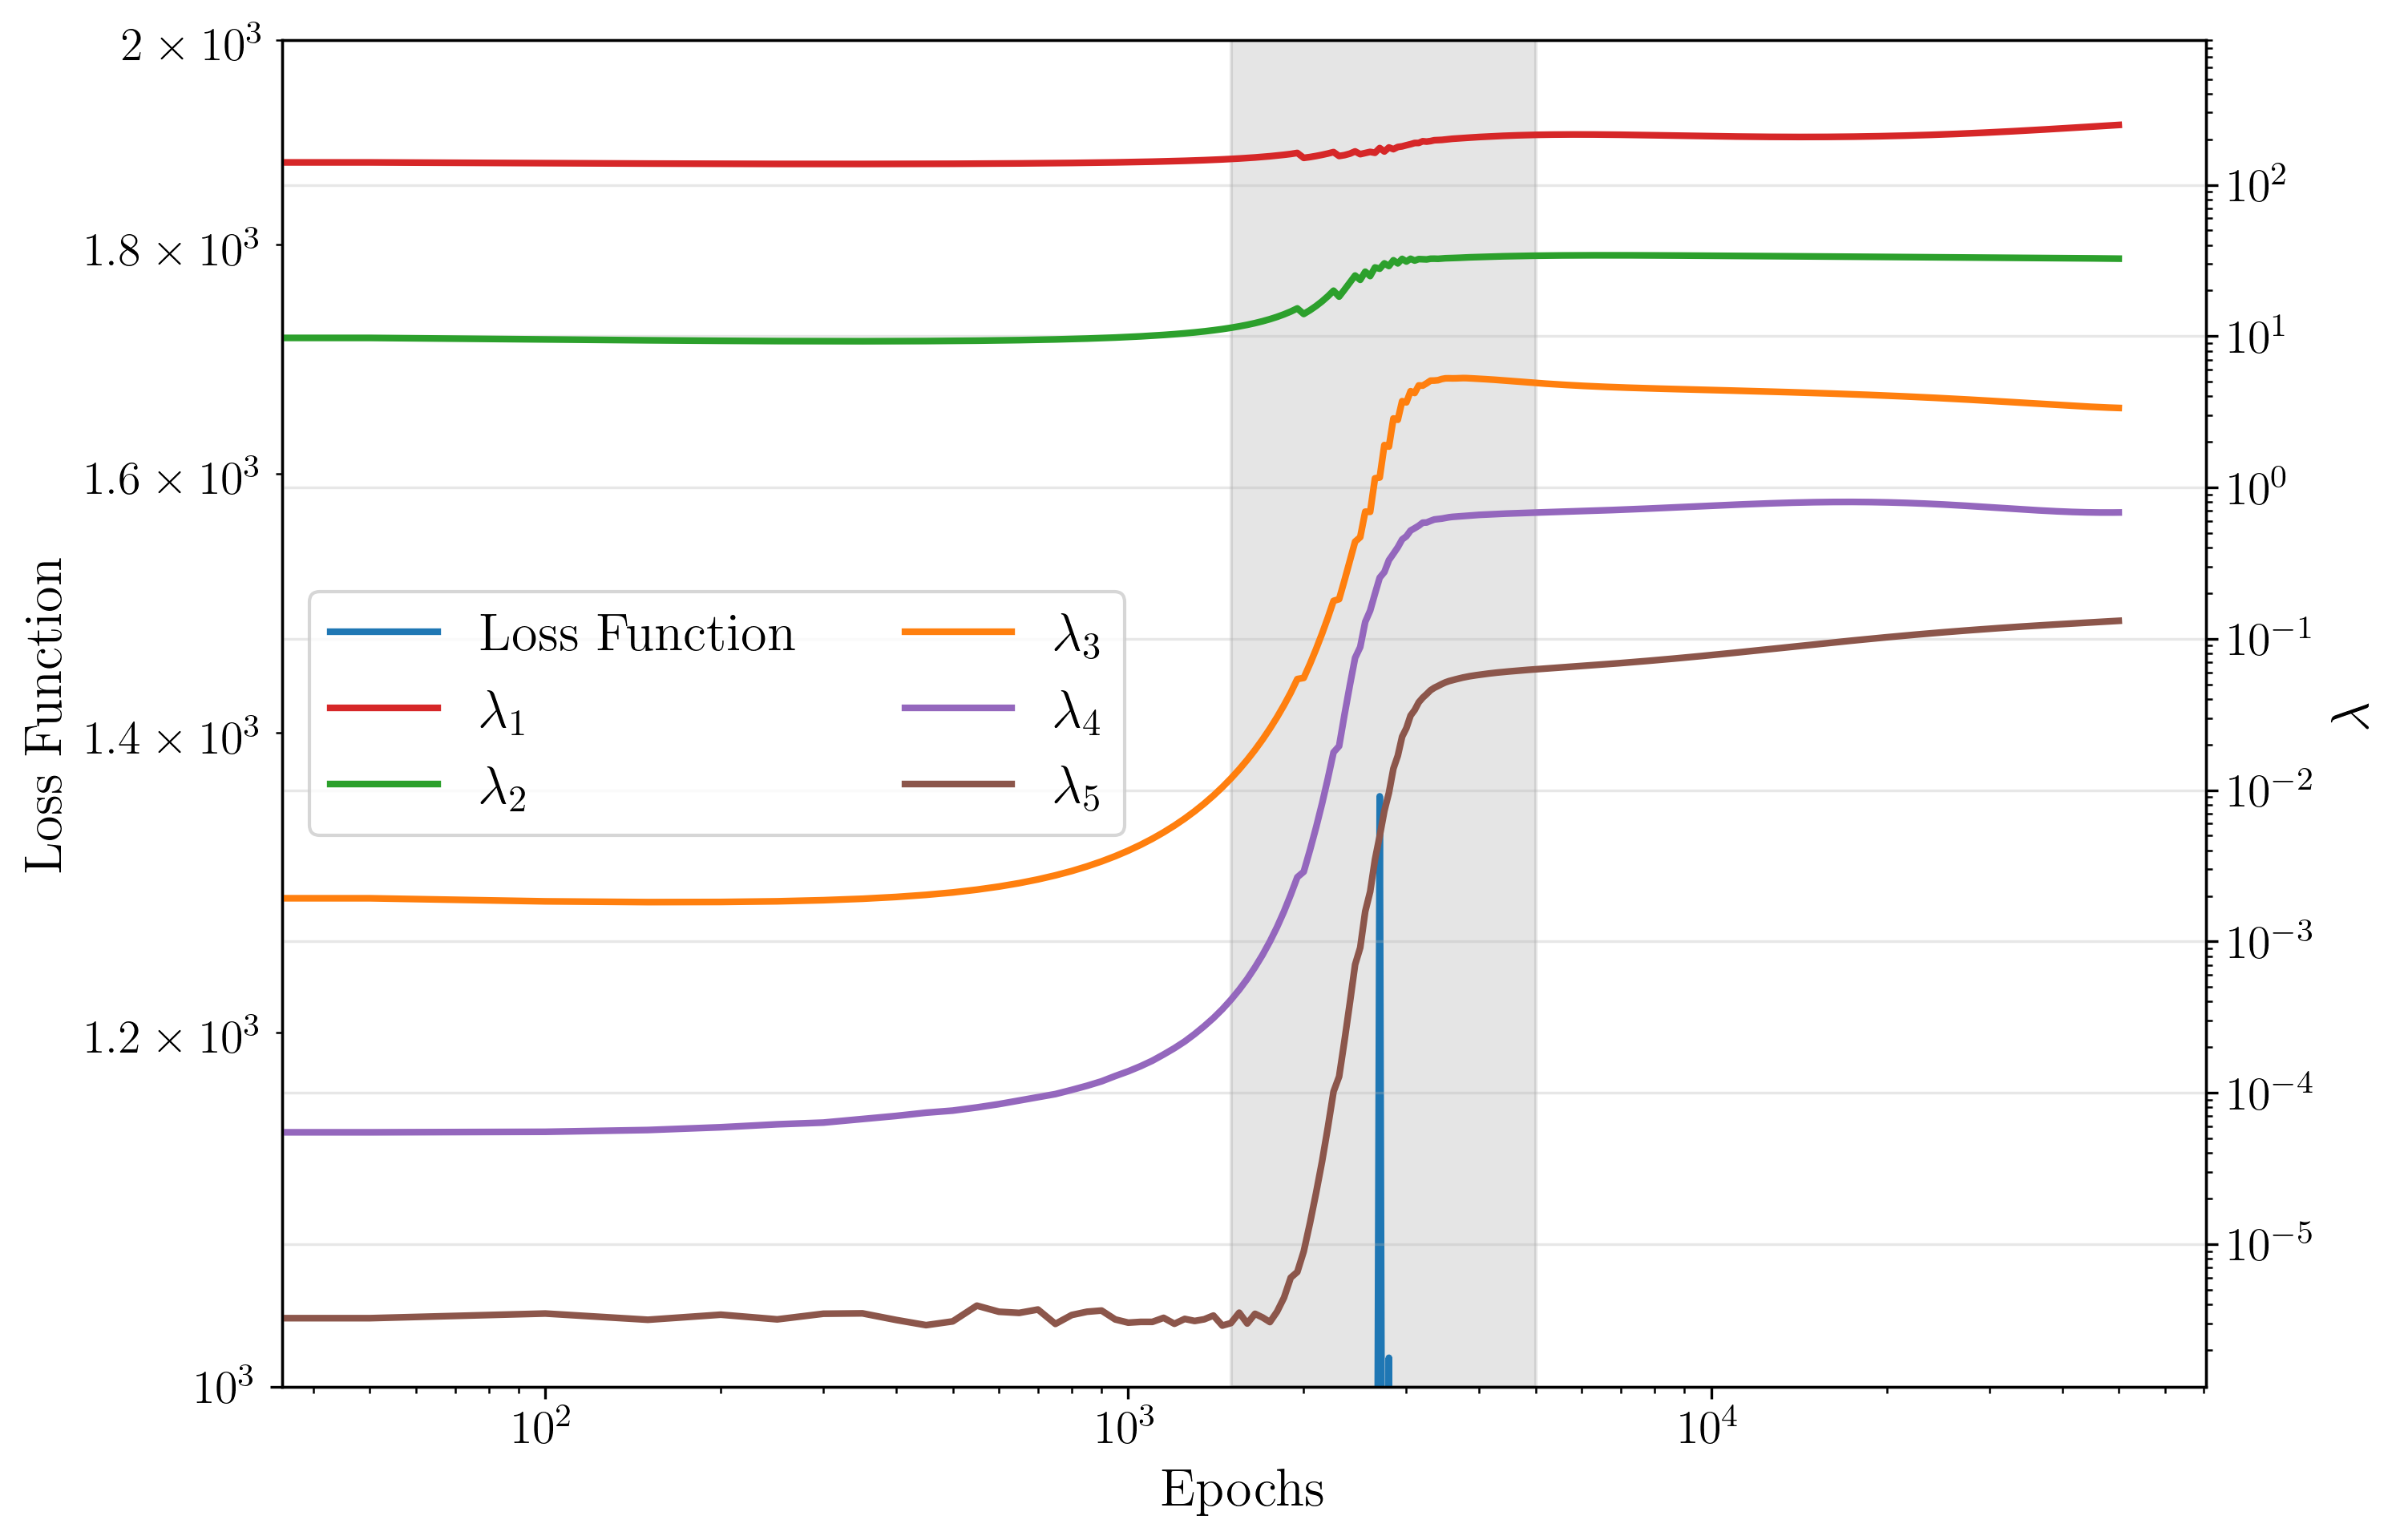

In [ ]:
from matplotlib import pyplot as plt
from yadlt.plotting.plotting import TICKSIZE, LEGENDSIZE, FONTSIZE, LABELSIZE
from pathlib import Path

# Set consistent style
plt.rcParams.update({
    'font.size': FONTSIZE,
    'axes.labelsize': LABELSIZE,
    'xtick.labelsize': TICKSIZE,
    'ytick.labelsize': TICKSIZE,
    'legend.fontsize': LEGENDSIZE,
    'figure.dpi': 300,
})

THIS = Path.cwd().parent / "doc/figs"

FIGRATIO = np.array((5, 3.4))
fig = plt.figure(figsize=FIGRATIO*2)
ax1 = fig.add_subplot(111)
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
rep = 4

# Plot first curve on left y-axis
color1 = 'tab:blue'
ax1.set_xlabel(r"$\rm{Epochs}$")
ax1.set_ylabel(r'$\textrm{Loss Function}$')
line1 = ax1.plot(epochs, loss[rep], color=color1, linewidth=2, label=r"$\textrm{Loss Function}$")
ax1.tick_params(axis='y')
ax1.axvspan(1.5e3, 5e3, alpha=0.2, color='grey')

# Create second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot second curve on right y-axis
ax2.set_ylabel(r"$\lambda$")
line2 = ax2.plot(epochs, eigval_1[rep], color="tab:red", linewidth=2, label=r"$\lambda_1$")
line2 = ax2.plot(epochs, eigval_2[rep], color="tab:green", linewidth=2, label=r"$\lambda_2$")
line2 = ax2.plot(epochs, eigval_3[rep], color="tab:orange", linewidth=2, label=r"$\lambda_3$")
line2 = ax2.plot(epochs, eigval_4[rep], color="tab:purple", linewidth=2, label=r"$\lambda_4$")
line2 = ax2.plot(epochs, eigval_5[rep], color="tab:brown", linewidth=2, label=r"$\lambda_5$")
ax2.tick_params(axis='y')

# Add title and legend
# plt.title(r"$\textrm{Loss Function and Top 5 NTK Eigenvalues vs Epochs (Replica %d)}$" % rep)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax2.legend(lines1 + lines2, labels1 + labels2, loc='center left', ncol=2)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_ylim(1e3, 2e3)

# Adjust layout and show
# plt.tight_layout()
ax2.grid(True, alpha=0.3)
fig.savefig(THIS / "section_3/loss_and_eigvals_vs_epochs.pdf", bbox_inches='tight')